# Conclusions

First, temperature does appear to correlate with latitude.  The warmest temperatures occur a bit north of the equator.  Temperatures cool off at higher and lower latitudes than that.

Second, humidity does not depend on latitude to any meaningful extent.

Third, cloud coverage does not depend on latitude to any meaningful extent.

Finally, wind speed does not depend on latitude to any meaningful extent.

In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
#import api key (remember to put your api key in the same directory as this file)
from api_keys import weather_api_key


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding latitudes and longitudes and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [51]:
#initialize the lists for temperature, humidity, cloud coverage, wind speed, city name, city latitude, and city longitude
#note that the latitude and longitude in the previous cell was a random point on land or in the ocean
#these latitudes and longitudes are where the nearest city actually is
temps = []
hums = []
clouds = []
winds = []
found_cities = []
lats = []
longs = []
#index to keep track of progress
i = -1
for city in cities:
    i=i+1
    #not all the city names are recognized
    try:
        #build the url and make the request
        w_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        w_data = requests.get(w_url).json()
        #append the data
        temps.append(w_data["main"]["temp"])
        hums.append(w_data["main"]["humidity"])
        clouds.append(w_data["clouds"]["all"])
        winds.append(w_data["wind"]["speed"])
        lats.append(w_data["coord"]["lat"])
        longs.append(w_data["coord"]["lon"])
        found_cities.append(city)
        #print the output
        print(f"Data for {city} added ({i})")
    #not all cities are found
    except KeyError:
        print(f"{city} not found ({i})")
#build the dataframe
wdf = pd.DataFrame({"City": found_cities,"Latitude": lats,"Longitude":longs, "Temperature (F)": temps, "Humidity": hums, "Wind Speed": winds, "Cloud Coverage": clouds})

Data for ushuaia added (0)
Data for kruisfontein added (1)
illoqqortoormiut not found (2)
Data for itarema added (3)
Data for sur added (4)
Data for oussouye added (5)
Data for yellowknife added (6)
Data for minot added (7)
taolanaro not found (8)
Data for hermanus added (9)
Data for port alfred added (10)
Data for sao filipe added (11)
Data for bredasdorp added (12)
Data for mar del plata added (13)
Data for kahului added (14)
Data for kapaa added (15)
Data for blythe added (16)
saleaula not found (17)
okandja not found (18)
Data for tekkali added (19)
Data for san patricio added (20)
Data for castro added (21)
Data for carballo added (22)
Data for fortuna foothills added (23)
Data for provideniya added (24)
Data for cherskiy added (25)
Data for ribeira grande added (26)
Data for tadine added (27)
chagda not found (28)
Data for ken caryl added (29)
Data for hobart added (30)
Data for fukue added (31)
Data for lebu added (32)
Data for vaini added (33)
Data for passo fundo added (34)
Da

litayen not found (276)
Data for llanes added (277)
Data for berlevag added (278)
barbar not found (279)
Data for iqaluit added (280)
Data for port-cartier added (281)
Data for gimli added (282)
Data for yucca valley added (283)
Data for umm kaddadah added (284)
Data for alepe added (285)
Data for gallup added (286)
Data for krasnokamensk added (287)
Data for casa grande added (288)
Data for batagay-alyta added (289)
Data for maumere added (290)
ruatoria not found (291)
Data for clemson added (292)
Data for umarga added (293)
Data for saint pete beach added (294)
Data for beyneu added (295)
Data for nemuro added (296)
Data for dalvik added (297)
Data for whitehorse added (298)
Data for haines junction added (299)
Data for aztec added (300)
tsienyane not found (301)
Data for hay river added (302)
Data for okha added (303)
Data for isangel added (304)
a not found (305)
Data for biak added (306)
Data for pochutla added (307)
Data for lom sak added (308)
Data for murshidabad added (309)
Da

usila not found (551)
Data for nairobi added (552)
kuche not found (553)
Data for farafangana added (554)
Data for shingu added (555)
Data for callaway added (556)
Data for pauini added (557)
Data for kudahuvadhoo added (558)
Data for roald added (559)
Data for hoquiam added (560)
Data for vila franca do campo added (561)
Data for kieta added (562)
Data for blagodatnoye added (563)
Data for sungai udang added (564)
Data for kristiansund added (565)
Data for barmer added (566)
Data for zelenoborsk added (567)
Data for tabas added (568)
Data for tommot added (569)
one hundred mile house not found (570)
Data for tigbao added (571)
Data for nong kung si added (572)
Data for valdez added (573)
Data for superior added (574)
Data for gazli added (575)
Data for luena added (576)
Data for shadegan added (577)
Data for totma added (578)
Data for mudgal added (579)
Data for tramore added (580)
Data for duluth added (581)
Data for chapais added (582)
Data for demyansk added (583)
Data for sulangan

In [69]:
#view the data
wdf

,City,Latitude,Longitude,Temperature (F),Humidity,Wind Speed,Cloud Coverage
0,ushuaia,-54.8000,-68.3000,41.23,92,6.02,100
1,kruisfontein,-34.0033,24.7314,48.18,75,3.96,1
2,itarema,-2.9248,-39.9167,82.81,65,19.80,22
3,sur,22.5667,59.5289,89.37,60,5.37,19
4,oussouye,12.4850,-16.5469,79.59,83,10.51,100
...,...,...,...,...,...,...,...
577,westport,41.1415,-73.3579,72.09,89,5.75,100
578,lorengau,-2.0226,147.2712,80.89,82,12.21,93
579,aykhal,66.0000,111.5000,50.00,87,15.41,100
580,cap malheureux,-19.9842,57.6142,66.47,89,17.40,100


In [72]:
#write the data to csv file
wdf.to_csv("output/weather_data.csv")

In [58]:
#check that all humidities make sense
wdf["Humidity"].max()

100

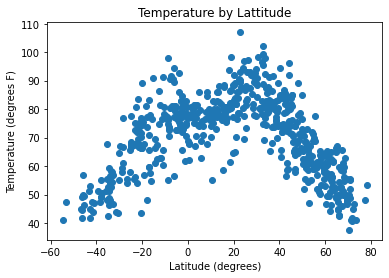

There seems to be a relationship between latitude and temperature.  Latitudes a bit north of the equator tend to have the highest temperatures. This makes sense because it is the middle of the year, so the daytime sun appears a bit north of the equator.


In [80]:
#graph the temperature as a function of latitude
plt.title("Temperature by Lattitude (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Temperature (degrees F)")
plt.xlabel("Latitude (degrees)")

plt.scatter(wdf["Latitude"],wdf["Temperature (F)"])
plt.savefig("output/temperature.png")
plt.show()
print("There seems to be a relationship between latitude and temperature.  Latitudes a bit north of the equator tend to have the highest temperatures. This makes sense because it is the middle of the year, so the daytime sun appears a bit north of the equator.")

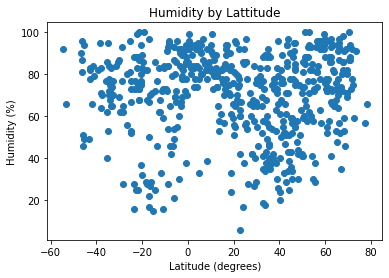

There is not an obvious correlation between latitude and humidity based on visual inspection.  There appear to be more points on the right side of the plot, perhaps because there is more land in the northern hemisphere.


In [81]:
#graph the humidity as a function of latitude
plt.title("Humidity by Lattitude (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.scatter(wdf["Latitude"],wdf["Humidity"])
plt.savefig("output/humidity.png")
plt.show()
print("There is not an obvious correlation between latitude and humidity based on visual inspection.  There appear to be more points on the right side of the plot, perhaps because there is more land in the northern hemisphere.")

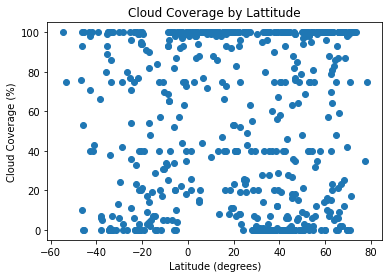

There is not an obvious correlation between cloud cover and latitude based on visual inspection.


In [82]:
#graph the cloud coverage as a function of latitude
plt.title("Cloud Coverage by Lattitude (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude (degrees)")
plt.scatter(wdf["Latitude"],wdf["Cloud Coverage"])
plt.savefig("output/cloud.png")
plt.show()
print("There is not an obvious correlation between cloud cover and latitude based on visual inspection.")

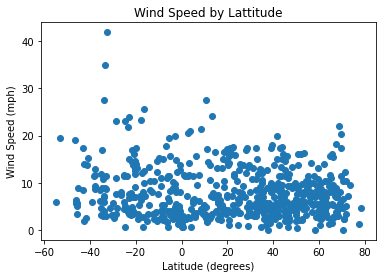

Based on visual inspection, southern latitudes may be slightly windier than norther latitudes.  This may be because of the way cities were selected.  Points were chosen randomly on the globe with a bias toward points near the poles than the equator.  (Each point has equal chances of ending up between 89 and 90 degrees as it does between 1 and 2 degrees, but there is vastly more area per degree latitude near the equator.)  The method used did not discriminate between points on land vs points in the ocean.  More of the southern hemisphere is covered in ocean than in the northern hemisphere.  Combining these facts, points in the southern hemisphere are more likely to be closest to a coastal city, where I would expect more wind.


In [84]:
#graph the wind speed as a function of latitude
plt.title("Wind Speed by Lattitude (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.scatter(wdf["Latitude"],wdf["Wind Speed"])
plt.savefig("output/wind.png")
plt.show()
print("Based on visual inspection, southern latitudes may be slightly windier than northern latitudes.  This may be because of the way cities were selected.  Points were chosen randomly on the globe with a bias toward points near the poles compared to near the equator.  (Each point has equal chances of ending up between 89 and 90 degrees as it does between 1 and 2 degrees, but there is vastly more area per degree latitude near the equator.)  The method used did not discriminate between points on land vs points in the ocean.  More of the southern hemisphere is covered in ocean than in the northern hemisphere.  Combining these facts, points in the southern hemisphere are more likely to be closest to a coastal city, where I would expect more wind.")

In [79]:
northdf = wdf.loc[wdf["Latitude"]>= 0,:]
southdf = wdf.loc[wdf["Latitude"]< 0,:]


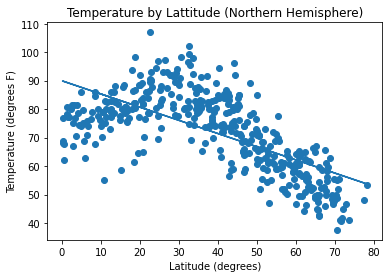

Equation of line:  Temperature = -0.4627340276671142 * Latitude + 89.93808126562325
Correlation Coefficient:  -0.6756887545430504


In [101]:
#run a linear regression then plot temperature as a function of latitude for half the planet
result = linregress(northdf["Latitude"],northdf["Temperature (F)"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Temperature by Lattitude (Northern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Temperature (degrees F)")
plt.xlabel("Latitude (degrees)")

plt.scatter(northdf["Latitude"],northdf["Temperature (F)"])
plt.plot(northdf["Latitude"],slope*northdf["Latitude"]+intercept)
plt.savefig("output/temperatureNorth.png")
plt.show()
print(f"Equation of line:  Temperature = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

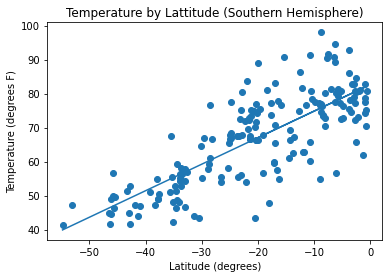

Equation of line:  Temperature = 0.7799246196828215 * Latitude + 82.66057533906137
Correlation Coefficient:  0.7837635238582817


In [102]:
#run a linear regression then plot temperature as a function of latitude for half the planet
result = linregress(southdf["Latitude"],southdf["Temperature (F)"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Temperature by Lattitude (Southern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Temperature (degrees F)")
plt.xlabel("Latitude (degrees)")

plt.scatter(southdf["Latitude"],southdf["Temperature (F)"])
plt.plot(southdf["Latitude"],slope*southdf["Latitude"]+intercept)
plt.savefig("output/temperatureSouth.png")
plt.show()
print(f"Equation of line:  Temperature = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

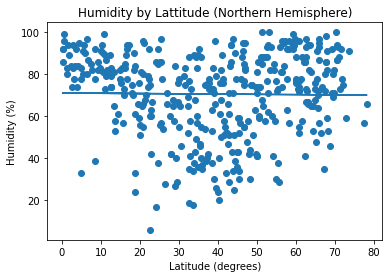

Equation of line:  Humidity = -0.012683165935219981 * Latitude + 71.10504124350278
Correlation Coefficient:  -0.01292507136612502


In [97]:
#run a linear regression then plot humidity as a function of latitude for half the planet
result = linregress(northdf["Latitude"],northdf["Humidity"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Humidity by Lattitude (Northern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")

plt.scatter(northdf["Latitude"],northdf["Humidity"])
plt.plot(northdf["Latitude"],slope*northdf["Latitude"]+intercept)
plt.savefig("output/humidityNorth.png")
plt.show()
print(f"Equation of line:  Humidity = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

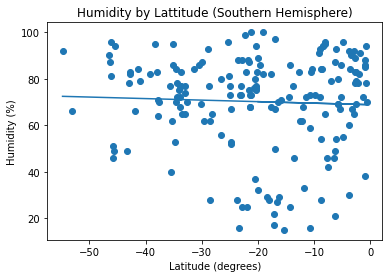

Equation of line:  Humidity = -0.0657392110723882 * Latitude + 68.84060411660198
Correlation Coefficient:  -0.04318126063668229


In [98]:
#run a linear regression then plot humidity as a function of latitude for half the planet
result = linregress(southdf["Latitude"],southdf["Humidity"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Humidity by Lattitude (Southern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")

plt.scatter(southdf["Latitude"],southdf["Humidity"])
plt.plot(southdf["Latitude"],slope*southdf["Latitude"]+intercept)
plt.savefig("output/humiditySouth.png")
plt.show()
print(f"Equation of line:  Humidity = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

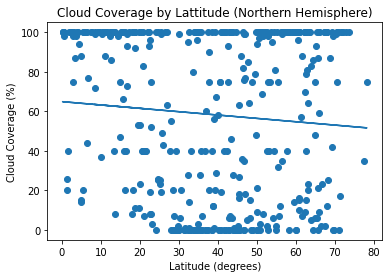

Equation of line:  Cloud Coverage = -0.16951839750450845 * Latitude + 64.89341471552045
Correlation Coefficient:  -0.08202646787317619


In [99]:
#run a linear regression then plot cloud coverage as a function of latitude for half the planet
result = linregress(northdf["Latitude"],northdf["Cloud Coverage"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Cloud Coverage by Lattitude (Northern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude (degrees)")

plt.scatter(northdf["Latitude"],northdf["Cloud Coverage"])
plt.plot(northdf["Latitude"],slope*northdf["Latitude"]+intercept)
plt.savefig("output/cloudNorth.png")
plt.show()
print(f"Equation of line:  Cloud Coverage = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

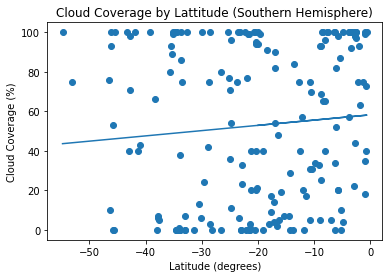

Equation of line:  Cloud Coverage = 0.26626059182241135 * Latitude + 58.22089194734893
Correlation Coefficient:  0.0902409651547828


In [100]:
#run a linear regression then plot cloud coverage as a function of latitude for half the planet
result = linregress(southdf["Latitude"],southdf["Cloud Coverage"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Cloud Coverage by Lattitude (Southern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Cloud Coverage (%)")
plt.xlabel("Latitude (degrees)")

plt.scatter(southdf["Latitude"],southdf["Cloud Coverage"])
plt.plot(southdf["Latitude"],slope*southdf["Latitude"]+intercept)
plt.savefig("output/cloudSouth.png")
plt.show()
print(f"Equation of line:  Cloud Coverage = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

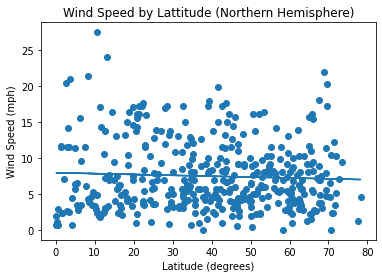

Equation of line:  Wind Speed = -0.012096356148666335 * Latitude + 7.967817741951963
Correlation Coefficient:  -0.050401977190212006


In [103]:
#run a linear regression then plot wind speed as a function of latitude for half the planet
result = linregress(northdf["Latitude"],northdf["Wind Speed"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Wind Speed by Lattitude (Northern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")

plt.scatter(northdf["Latitude"],northdf["Wind Speed"])
plt.plot(northdf["Latitude"],slope*northdf["Latitude"]+intercept)
plt.savefig("output/windNorth.png")
plt.show()
print(f"Equation of line:  Wind Speed = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")

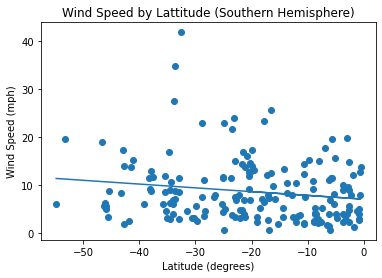

Equation of line:  Wind Speed = -0.07875230226295733 * Latitude + 7.0772764118441165
Correlation Coefficient:  -0.16592363834599191


In [104]:
#run a linear regression then plot wind speed as a function of latitude for half the planet
result = linregress(southdf["Latitude"],southdf["Wind Speed"])
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
plt.title("Wind Speed by Lattitude (Southern Hemisphere) (as measured on 8/1/2022 at about 1 pm US Central Time)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")

plt.scatter(southdf["Latitude"],southdf["Wind Speed"])
plt.plot(southdf["Latitude"],slope*southdf["Latitude"]+intercept)
plt.savefig("output/windSouth.png")
plt.show()
print(f"Equation of line:  Wind Speed = {slope} * Latitude + {intercept}")
print(f"Correlation Coefficient:  {rvalue}")